In [13]:
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
# Assume first column is string of datetime, check with 
df_fcu_sth_raw = pd.read_csv('data/Gnd floor FCU Sth 16032020.csv', parse_dates=[0],  dayfirst=True)
df_fcu_nth_raw = pd.read_csv('data/Gnd floor FCU North 16032020.csv', parse_dates=[0],  dayfirst=True)
df_ahu_raw = pd.read_csv('data/Gnd AHU multi list 16032020.csv', parse_dates=[0],  dayfirst=True)
df_chiller_boiler_raw = pd.read_csv('data/more_Data/chillers boilers thermal Feb 23032020.csv', parse_dates=[0],  dayfirst=True)
df_gas_usage_raw = pd.read_csv('data/more_Data/Gas Usage DHW _ HHW Feb 2020  23032020.csv', parse_dates=[0],  dayfirst=True)


In [72]:
all_col_but_timestamp = [col for col in df_gas_usage_raw.columns if col != 'Timestamp']
df_gas_usage_raw = df_gas_usage_raw.replace(',','', regex=True)
df_gas_usage_raw[all_col_but_timestamp] = df_gas_usage_raw[all_col_but_timestamp].apply(pd.to_numeric)

In [78]:
# Clean column titles
df_gas_usage_raw.columns = [
    col.replace(' Extended Trend Log', '').replace(' - Ext', '').replace(' Extended Trend Log', '').replace(' Trend Log', '')
    for col in df_gas_usage_raw.columns
]

# Filter for only Febuary 
start_date = '2020-02-01'
end_date = '2020-02-25'
date_mask = (df_gas_usage_raw['Timestamp'] >= start_date) & (df_gas_usage_raw['Timestamp'] < end_date)

df_gas_usage = df_gas_usage_raw.loc[date_mask]

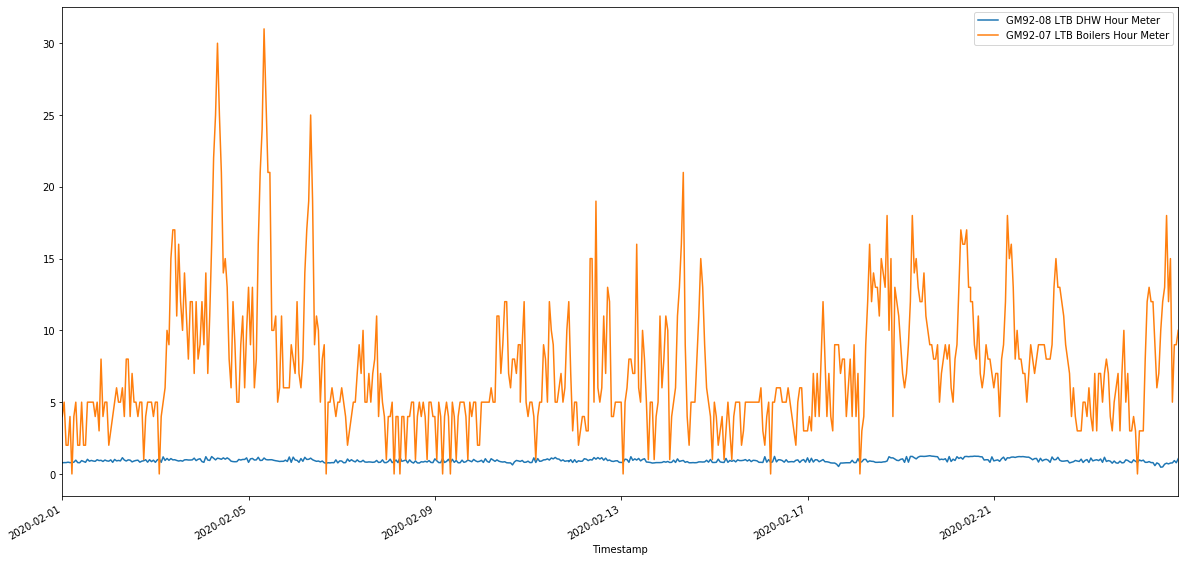

In [79]:
 # Get current axis
fig= plt.figure(figsize=(20,10))
ax = plt.gca()

for col in df_gas_usage.columns:
    if col != 'Timestamp':
        df_gas_usage.plot(kind='line',x='Timestamp',y=col, ax=ax)

plt.show()

# Boiler Data Display

In [65]:
df_chiller_boiler_raw


# Clean column titles
df_chiller_boiler_raw.columns = [
    col.replace(' - Extended Trend Log', '').replace(' - Ext', '').replace(' Extended Trend Log', '').replace(' Trend Log', '')
    for col in df_chiller_boiler_raw.columns
]

# Filter for only Febuary 
start_date = '2020-02-01'
end_date = '2020-02-25'
date_mask = (df_chiller_boiler_raw['Timestamp'] >= start_date) & (df_chiller_boiler_raw['Timestamp'] < end_date)

df_chiller_boiler = df_chiller_boiler_raw.loc[date_mask]

In [66]:
# Convert all other columns to float
all_col_but_timestamp = [col for col in df_chiller_boiler.columns if col != 'Timestamp']
df_chiller_boiler = df_chiller_boiler.replace(',','', regex=True)
df_chiller_boiler[all_col_but_timestamp] = df_chiller_boiler[all_col_but_timestamp].apply(pd.to_numeric)

print(df_chiller_boiler.columns)

Index(['Timestamp', 'LTB CH1 thermal Hour Meter', 'LTB CH2 Thermal Hour Meter',
       'LTB CH3 Thermal Hour Meter', 'B_4_02 Thermal Hour Meter',
       'B_4_01 Thermal Hour Meter', 'LTB  BLR1 Thermal Hour Meter',
       'LTB  BLR2 Thermal Hour Meter'],
      dtype='object')


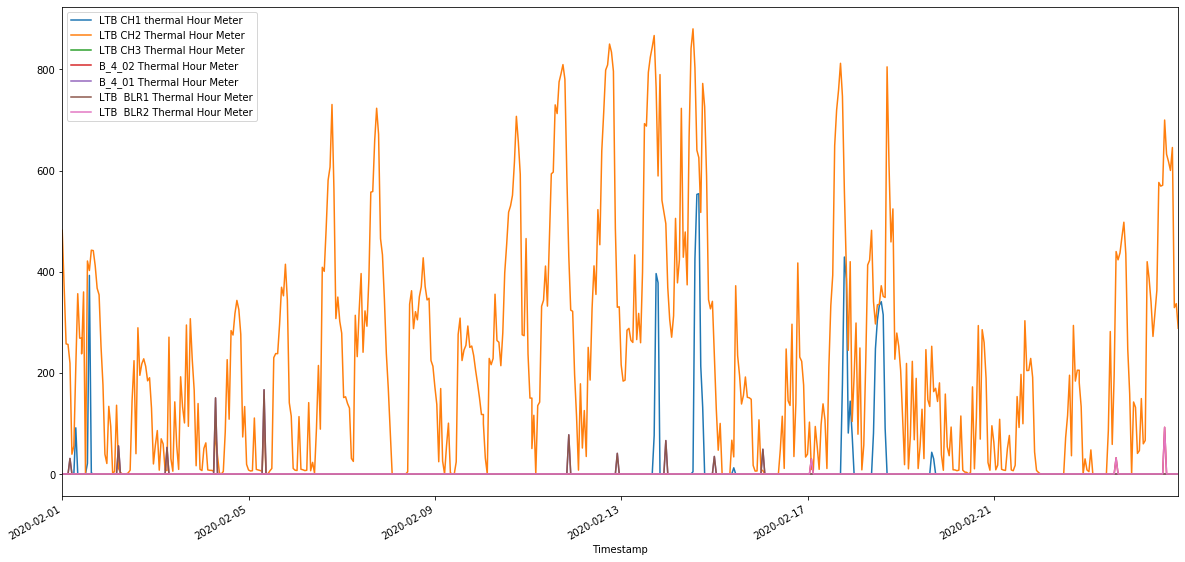

In [67]:
 # Get current axis
fig= plt.figure(figsize=(20,10))
ax = plt.gca()

for col in df_chiller_boiler.columns:
    if col != 'Timestamp':
        df_chiller_boiler.plot(kind='line',x='Timestamp',y=col, ax=ax)

plt.show()


# Temp Data Display

In [15]:
# Merge into one larger dataframe
# Nth is in 1 and 5 min increments, Sth is in 5 min increments so merged table is in 5 mins
df_internal_temp_raw = pd.merge(df_fcu_sth_raw, df_fcu_nth_raw, on='Timestamp')
del df_internal_temp_raw['hour']

# Clean column titles
df_internal_temp_raw.columns = [
    col.replace(' Extended Trend Log', '').replace(' - Trend - Extd', '').replace('-00', '')
    for col in df_internal_temp_raw.columns
]

# Filter for only Febuary 
start_date = '2020-02-01'
end_date = '2020-03-01'
date_mask = (df_internal_temp_raw['Timestamp'] >= start_date) & (df_internal_temp_raw['Timestamp'] < end_date)

df_internal_temp = df_internal_temp_raw.loc[date_mask]

In [17]:
df_internal_temp.columns

Index(['Timestamp', 'FCU-01 SaTmp', 'FCU-01 ZnTmp', 'FCU-02 SaTmp',
       'FCU-02 ZnTmp', 'FCU-04 SaTmp', 'FCU-04 ZnTmp', 'FCU-06 SaTmp',
       'FCU-06 ZnTmp', 'FCU-07 SaTmp', 'FCU-07 ZnTmp', 'FCU-08 SaTmp',
       'FCU-08 ZnTmp', 'FCU-09 SaTmp', 'FCU-09 ZnTmp', 'FCU-15 SaTmp',
       'FCU-15 ZnTmp', 'FCU-16 SaTmp', 'FCU-16 ZnTmp', 'FCU-21 SaTmp',
       'FCU-21 ZnTmp', 'FCU-22 SaTmp', 'FCU-22 ZnTmp', 'FCU-23 SaTmp',
       'FCU-23 ZnTmp', 'FCU-24 SaTmp', 'FCU-24 ZnTmp', 'OaTmp', 'OaRH'],
      dtype='object')

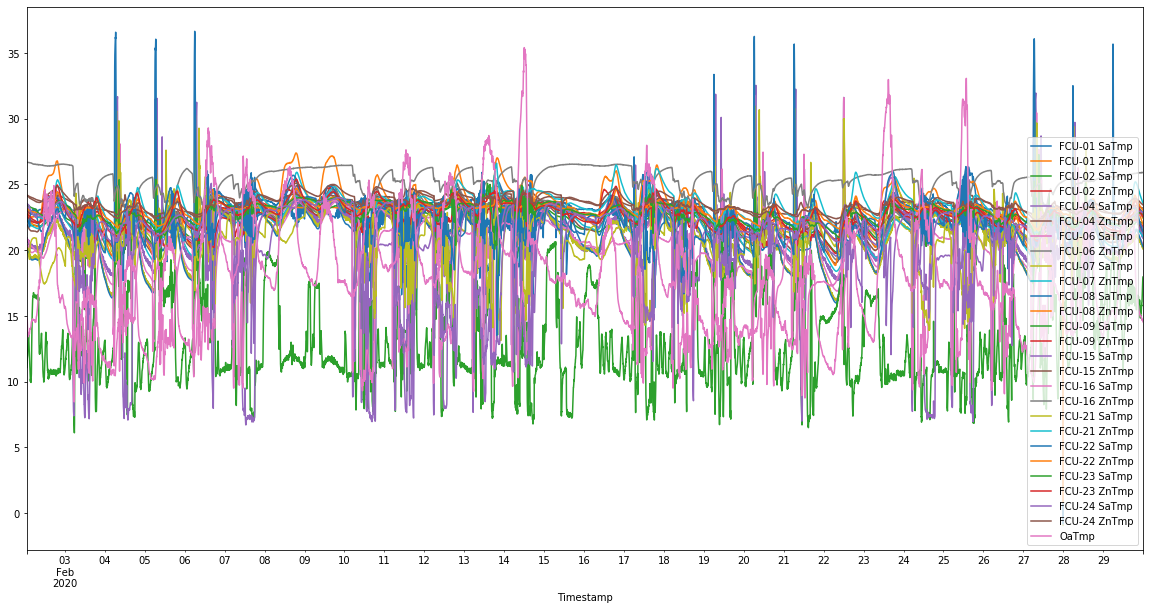

In [33]:
 # Get current axis
fig= plt.figure(figsize=(20,10))
ax = plt.gca()

for col in df_internal_temp.columns:
    if col != 'Timestamp' and col != 'OaRH':
        df_internal_temp.plot(kind='line',x='Timestamp',y=col, ax=ax)

plt.show()
